### Task 2
* Professor: Aléssio Tony Cavalcanti de Almeida
* Disciplina: Aprendizagem de Máquina Supervisionada
* Aluna: Maria Carolina

In [ ]:
# Instalando as bibliotecas necessárias
!pip install seaborn pandas matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.3 MB 6.7 MB/s eta 0:00:02
   ---------------------------- ----------- 8.1/11.3 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 18.7 MB/s  0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- ----------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style ="whitegrid")


In [4]:
# baixar em " https :// download . inep .gov.br/ microdados /
file = 'dados/TS_ALUNO_34EM.csv'
df = pd.read_csv(file)
df = pd.read_csv(file , sep=";")
# Espiando as primeiras linhas
df.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,IN_PUBLICA,ID_LOCALIZACAO,ID_TURMA,ID_SERIE,...,TX_RESP_Q23b,TX_RESP_Q23c,TX_RESP_Q23d,TX_RESP_Q23e,TX_RESP_Q23f,TX_RESP_Q23g,TX_RESP_Q23h,TX_RESP_Q23i,TX_RESP_Q24,TX_RESP_Q25
0,2023,1,11,6322170,2,61412274,1,1,1475345,12,...,B,B,B,B,B,B,B,B,D,A
1,2023,1,11,6322170,2,61412274,1,1,1475345,12,...,A,B,B,D,B,A,B,B,D,A
2,2023,1,11,6322170,2,61412274,1,1,1475345,12,...,B,B,B,B,B,B,B,B,C,A
3,2023,1,11,6322170,2,61412274,1,1,1475345,12,...,B,C,A,A,A,C,A,A,C,A
4,2023,1,11,6322170,2,61412274,1,1,1475345,12,...,B,A,B,B,B,C,B,A,C,A


In [5]:
# Quantas observações temos?
df.shape

(2091337, 117)

In [ ]:
#Quais variáveis são numéricas? Quais são categóricas?
df.dtypes

ID_SAEB          int64
ID_REGIAO        int64
ID_UF            int64
ID_MUNICIPIO     int64
ID_AREA          int64
                 ...  
TX_RESP_Q23g    object
TX_RESP_Q23h    object
TX_RESP_Q23i    object
TX_RESP_Q24     object
TX_RESP_Q25     object
Length: 117, dtype: object

In [7]:
# Hávariáveis com muitos valores faltantes?
    #R-
df.isna().mean()


ID_SAEB         0.0
ID_REGIAO       0.0
ID_UF           0.0
ID_MUNICIPIO    0.0
ID_AREA         0.0
               ... 
TX_RESP_Q23g    0.0
TX_RESP_Q23h    0.0
TX_RESP_Q23i    0.0
TX_RESP_Q24     0.0
TX_RESP_Q25     0.0
Length: 117, dtype: float64

In [8]:
num_cols = ["ID_REGIAO","ID_LOCALIZACAO", "IN_PUBLICA","TX_RESP_Q02","PROFICIENCIA_LP_SAEB", "PROFICIENCIA_MT_SAEB", ]
df[ num_cols ].describe()

,ID_REGIAO,ID_LOCALIZACAO,IN_PUBLICA,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB
count,2.091337e+06,2.091337e+06,2.091337e+06,1.525957e+06,1.525957e+06
mean,2.798803e+00,1.054954e+00,9.729838e-01,2.735464e+02,2.683073e+02
std,1.026133e+00,2.278902e-01,1.621306e-01,5.102994e+01,4.713351e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.418510e+02,1.674570e+02
25%,2.000000e+00,1.000000e+00,1.000000e+00,2.365083e+02,2.326088e+02
50%,3.000000e+00,1.000000e+00,1.000000e+00,2.768605e+02,2.649093e+02
75%,3.000000e+00,1.000000e+00,1.000000e+00,3.116410e+02,2.980696e+02
max,5.000000e+00,2.000000e+00,1.000000e+00,4.087316e+02,4.536634e+02


In [9]:
df.columns


Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'IN_PUBLICA', 'ID_LOCALIZACAO', 'ID_TURMA', 'ID_SERIE',
       ...
       'TX_RESP_Q23b', 'TX_RESP_Q23c', 'TX_RESP_Q23d', 'TX_RESP_Q23e',
       'TX_RESP_Q23f', 'TX_RESP_Q23g', 'TX_RESP_Q23h', 'TX_RESP_Q23i',
       'TX_RESP_Q24', 'TX_RESP_Q25'],
      dtype='object', length=117)

#### Visualizando Distribui ̧c ̃oes: Histogramas

* A distribuição  ́e mais concentrada em qual faixa?
R- da nota de matematica em 200 a 400 e da nota de portugês 150 a 400
* Parece haver muitos valores muito baixos ou muito altos?
R- sem em ambas as notas aparece valores mais altos

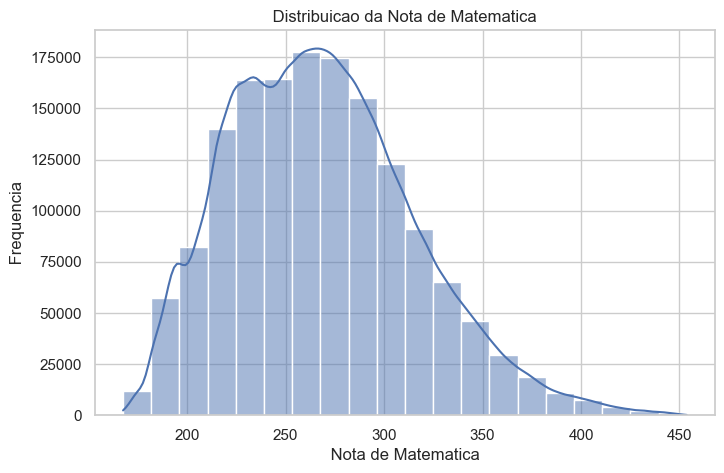

In [10]:
plt.figure(figsize =(8, 5))
sns.histplot(data =df , x="PROFICIENCIA_MT_SAEB", bins =20 , kde= True )
plt.title(" Distribuicao da Nota de Matematica ")
plt. xlabel (" Nota de Matematica ")
plt. ylabel (" Frequencia ")
plt.show()

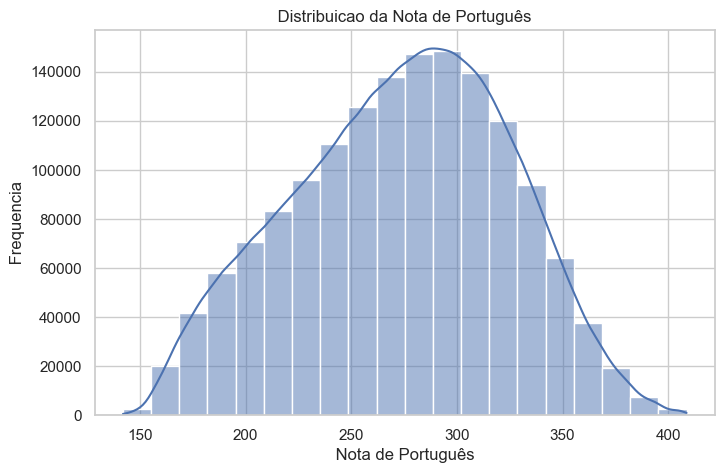

In [11]:
plt.figure(figsize =(8, 5))
sns.histplot(data =df , x="PROFICIENCIA_LP_SAEB", bins =20 , kde= True )
plt.title(" Distribuicao da Nota de Português ")
plt. xlabel (" Nota de Português ")
plt. ylabel (" Frequencia ")
plt.show()

#### Comparando Grupos: Boxplots

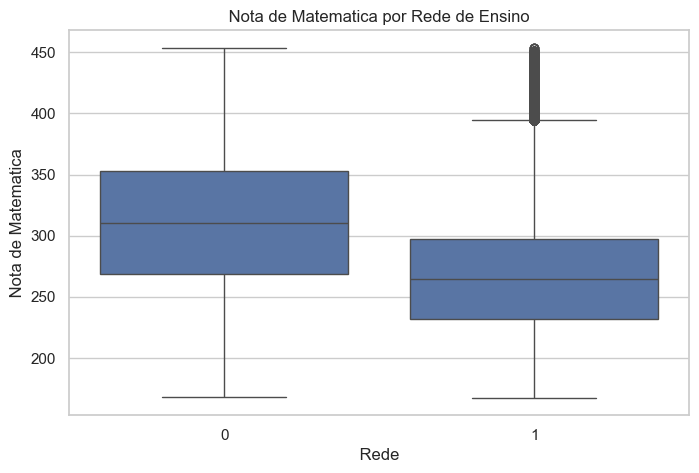

In [12]:
plt.figure(figsize =(8, 5))
sns.boxplot(data =df , x="IN_PUBLICA", y="PROFICIENCIA_MT_SAEB")
plt.title(" Nota de Matematica por Rede de Ensino ")
plt. xlabel (" Rede ")
plt. ylabel (" Nota de Matematica ")
plt.show()

#### Médias por Categoria: Gráfico de Barras

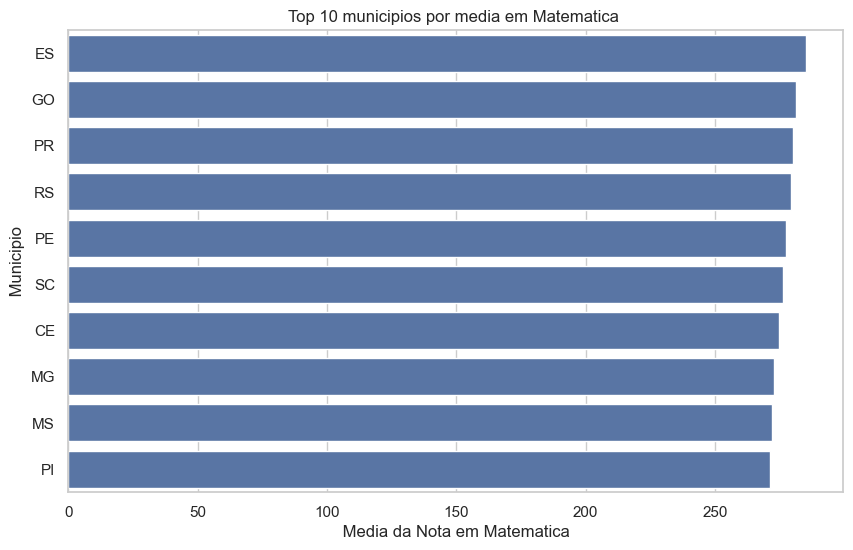

In [38]:
mapa_uf = {
    11:'RO', 12:'AC', 13:'AM', 14:'RR', 15:'PA', 16:'AP', 17:'TO',
    21:'MA', 22:'PI', 23:'CE', 24:'RN', 25:'PB', 26:'PE', 27:'AL',
    28:'SE', 29:'BA', 31:'MG', 32:'ES', 33:'RJ', 35:'SP',
    41:'PR', 42:'SC', 43:'RS', 50:'MS', 51:'MT', 52:'GO', 53:'DF'
}


df_mean = (df
.groupby("ID_UF")["PROFICIENCIA_MT_SAEB"]
. mean ()
.round(2)  
.sort_values(ascending = False )
.head(10)
)
plt.figure(figsize =(10 , 6))
sns.barplot(x=df_mean.values , y=df_mean.index.map(mapa_uf))
plt.title("Top 10 municipios por media em Matematica ")
plt. xlabel (" Media da Nota em Matematica ")
plt. ylabel (" Municipio ")
plt.show()

c:\Users\Carolina\Desktop\Projetos\CDN_UFPB\5_periodo\APRENDIZAGEM_DE_MÁQUINA_SUPERVISIONADA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


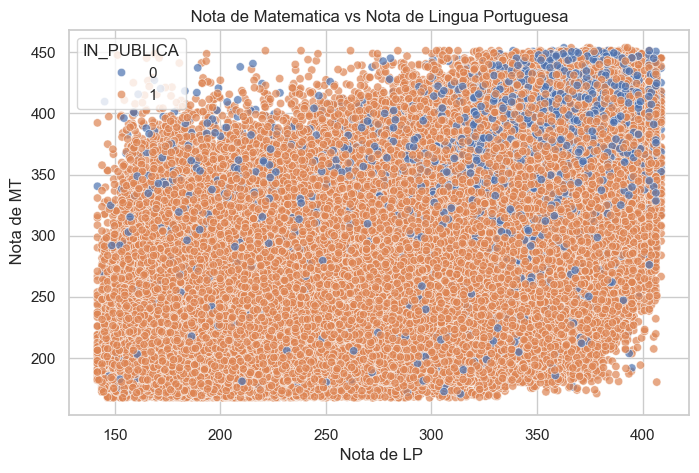

In [19]:
plt.figure(figsize =(8, 5))
sns.scatterplot(data =df , x="PROFICIENCIA_LP_SAEB", y="PROFICIENCIA_MT_SAEB",

hue="IN_PUBLICA", alpha =0.7 )

plt.title(" Nota de Matematica vs Nota de Lingua Portuguesa ")
plt. xlabel (" Nota de LP")
plt. ylabel (" Nota de MT")
plt.show()

#### Desafio 1

* A variável numérica é: nota de português(PROFICIENCIA_LP_SAEB)
* A variável categórica é: rede(IN_PUBLICA)




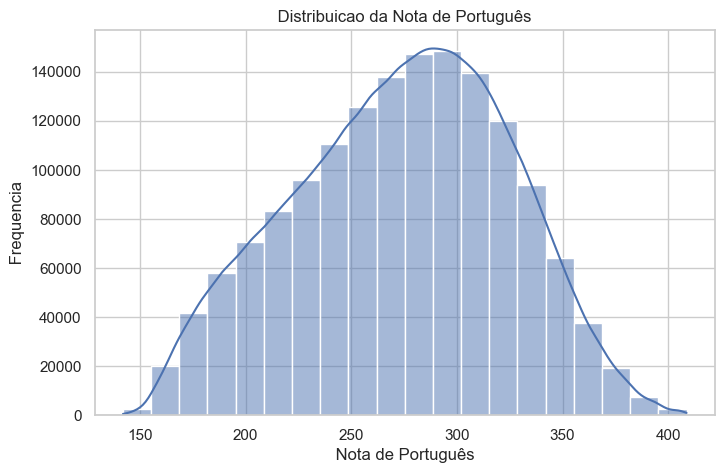

In [33]:
# Histograma
plt.figure(figsize =(8, 5))
sns.histplot(data =df , x="PROFICIENCIA_LP_SAEB", bins =20 , kde= True )
plt.title(" Distribuicao da Nota de Português ")
plt. xlabel (" Nota de Português ")
plt. ylabel (" Frequencia ")
plt.show()

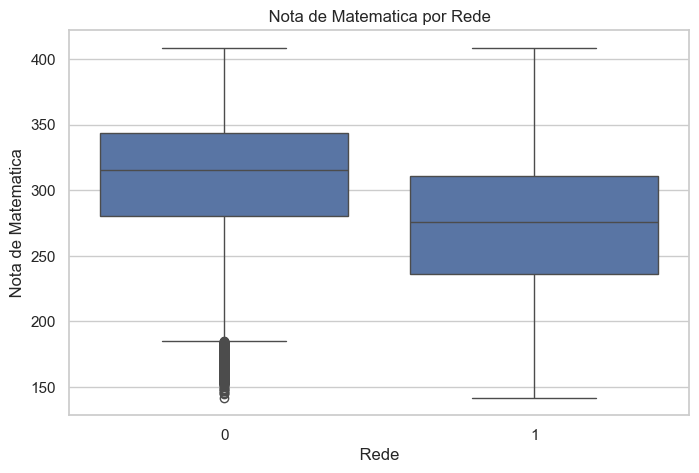

In [ ]:
# boxplot
plt.figure(figsize =(8, 5))
sns.boxplot(data =df , x="IN_PUBLICA", y="PROFICIENCIA_LP_SAEB")
plt.title(" Nota de português por Rede ")
plt. xlabel (" Rede ")
plt. ylabel (" Nota de português ")
plt.show()

Observa-se uma diferença significativa de desempenho em português, onde a mediana das notas das escolas privadas (0) é superior à das escolas públicas (1). Além disso, a variabilidade das notas na rede pública é maior, com uma cauda longa de notas muito baixas (outliers inferiores)

#### Desafio 2

* variável alvo : Nota de matemática(PROFICIENCIA_MT_SAEB)
* variáveis explicativas: wi-fi(TX_RESP_Q13b) e escolaridade da mãe(TX_RESP_Q08)

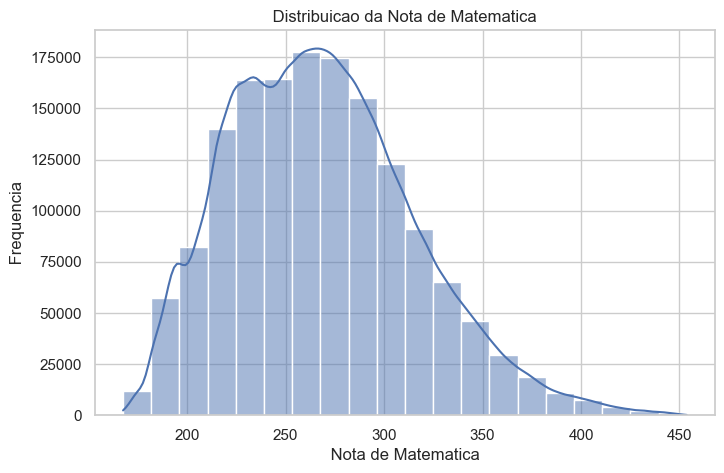

In [22]:
# histograma da variável alvo:
plt.figure(figsize =(8, 5))
sns.histplot(data =df , x="PROFICIENCIA_MT_SAEB", bins =20 , kde= True )
plt.title(" Distribuicao da Nota de Matematica ")
plt. xlabel (" Nota de Matematica ")
plt. ylabel (" Frequencia ")
plt.show()

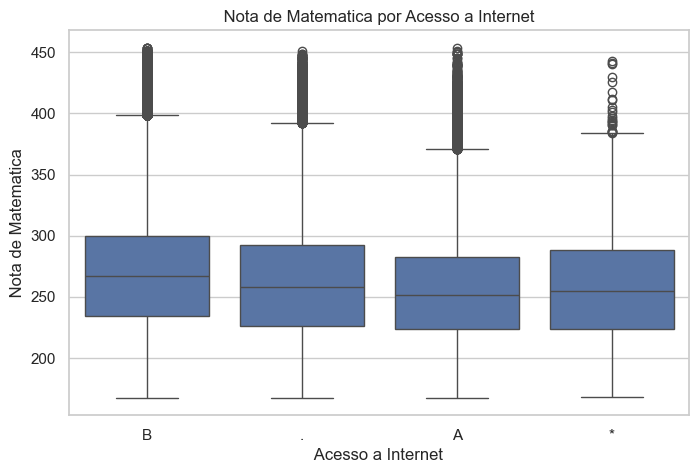

In [27]:
# boxplot da vari ́avel alvo por algum grupo:
plt.figure(figsize =(8, 5))
sns.boxplot(data =df , x="TX_RESP_Q13b", y="PROFICIENCIA_MT_SAEB")
plt.title(" Nota de Matematica por Acesso a Internet ")
plt. xlabel (" Acesso a Internet ")
plt. ylabel (" Nota de Matematica ")
plt.show()

c:\Users\Carolina\Desktop\Projetos\CDN_UFPB\5_periodo\APRENDIZAGEM_DE_MÁQUINA_SUPERVISIONADA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


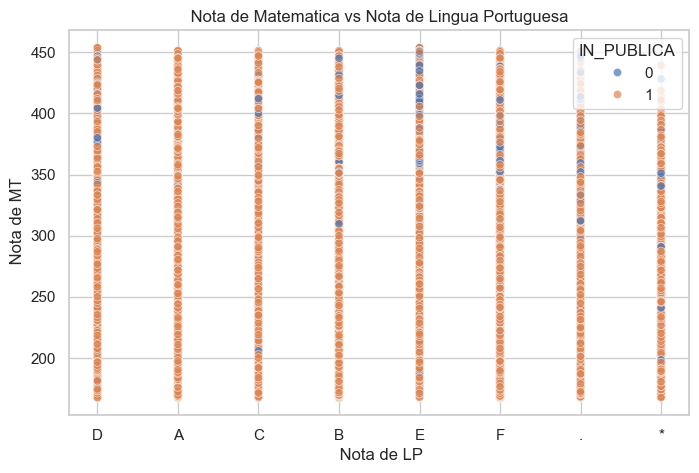

In [ ]:
# gráfico de dispersão entre a variável alvo e uma variável explicativa:
plt.figure(figsize =(8, 5))
sns.scatterplot(data =df , x="TX_RESP_Q08", y="PROFICIENCIA_MT_SAEB",

hue="IN_PUBLICA", alpha =0.7 )

plt.title(" Proficiência em Matemática vs Escolaridade da Mãe ")
plt. xlabel (" Escolaridade da mãe")
plt. ylabel (" Nota de MT")
plt.show()

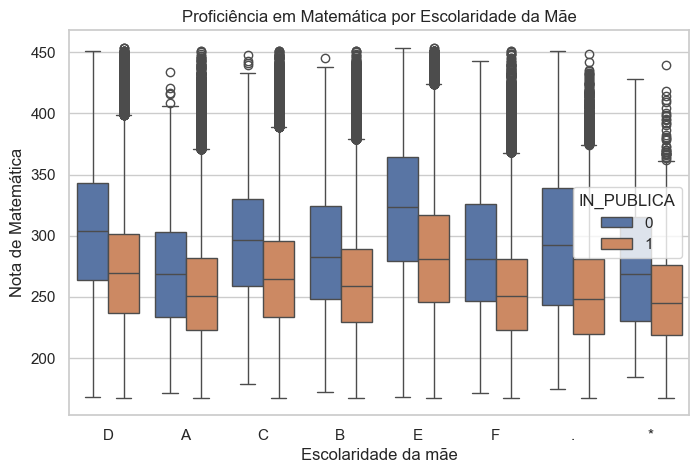

In [32]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="TX_RESP_Q08",
    y="PROFICIENCIA_MT_SAEB",
    hue="IN_PUBLICA"
)

plt.title("Proficiência em Matemática por Escolaridade da Mãe")
plt.xlabel("Escolaridade da mãe")
plt.ylabel("Nota de Matemática")

plt.show()



* Hipotese: Alunos cujas mães possuem ensino superior completo (TX_RESP_Q08) e que possuem acesso a internet em casa (TX_RESP_Q12b, TX_RESP_Q13b) apresentarão uma média de proficiência em matemática (PROFICIENCIA_MT_SAEB) superior aos que não possuem, controlando pelo nível socioeconômico (NU_TIPO_NIVEL_INSE)? 
* no boxplot que os alunos com acesso à internet (Categoria B) possuem uma mediana de notas maior aos que não têm (Categoria A). A caixa azul do grupo "B" está  para cima em relação à do grupo "A".
* a categoria "E" (Ensino Superior completo) apresenta as maiores medianas, ou seja, mostra uma "escada" de crescimento: conforme a escolaridade da mãe aumenta (de A para E), a nota do aluno também sobe, tanto na rede pública quanto na privada.
